# cumcm-a

## 准备阶段

### 数据读取

In [ ]:
import pandas as pd

# 主索节点的坐标和编号
data1 = pd.read_csv("data/附件1.csv", encoding='ANSI')
# print('主索节点的坐标和编号:\n', data1)
nodes_data = {}
for d in data1.itertuples():
  nodes_data[d[1]] = {
    # 'position': tuple(d[2:]),
    'position_raw': np.array(d[2:]),
    'position': np.array(d[2:]),
    # 伸缩量，即所有需要求解的变量
    'expand': 0
  }

# 促动器下端点（地锚点）坐标、
# 基准态时上端点（顶端）的坐标，
# 以及促动器对应的主索节点编号
data2 = pd.read_csv("data/附件2.csv", encoding='ANSI')
# print('data2:\n', data2)
for d in data2.itertuples():
  nodes_data[d[1]]['actuactor_head'] = np.array(d[2:5])
  nodes_data[d[1]]['actuactor_base'] = np.array(d[5:8])

# print(nodes_data)

triangles_data = []

# 反射面板对应的主索节点编号
data3 = pd.read_csv("data/附件3.csv", encoding='ANSI')
# print('data3:\n', data3)
for d in data3.itertuples():
  # triangles_data.append(tuple(d[1:]))
  triangles_data.append(np.array(d[1:]))

# print(triangles_data)

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "D:\Software\Anaconda3\envs\pytorch\python.exe"
  * The NumPy version is: "1.20.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: 找不到指定的模块。


### 测试绘图

绘制点的函数

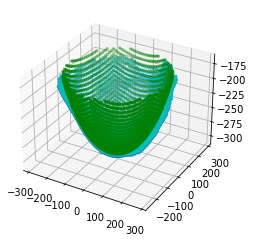

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制当前图像
def draw_points(points: np.ndarray = None, nodes_data_: dict = nodes_data):
  if points is None:
    points = to_points(nodes_data_ = nodes_data_)
  ax = plt.axes(projection='3d')
  ax.scatter3D(points.T[0], points.T[1], points.T[2], c="g", marker='.')
  points2 = to_points(nodes_data_ = nodes_data_, dict_key='actuactor_head')
  ax.scatter3D(points2.T[0], points2.T[1], points2.T[2], c="c", marker='.')
  points3 = to_points(nodes_data_ = nodes_data_, dict_key='actuactor_base')
  ax.scatter3D(points3.T[0], points3.T[1], points3.T[2], c='m', marker='.')
  plt.show()

# 拿到单位方向向量(pt1 -> pt2)
def get_unit_vector(pt1: np.ndarray, pt2: np.ndarray) -> np.ndarray:
  a = pt2 - pt1
  n = a / np.sqrt(a[0] ** 2 + a[1] ** 2 + a[2] ** 2)
  return n

# 计算在当前伸缩值状态下，主索节点的位置(position)
def update_expand(nodes_data_: dict = nodes_data):
  for name in nodes_data_:
    node = nodes_data_[name]
    # 用促动器下端坐标和最初的主索节点位置确定方向向量，计算伸缩量
    n = get_unit_vector(node['position_raw'], node['actuactor_base'])
    # 更新 position
    node['position'] = node['position_raw'] + n * node['expand']
    
# 转换数据到坐标
def to_points(nodes_data_: dict = nodes_data, dict_key: str = 'position') -> np.ndarray:
  points = []
  for name in nodes_data_:
    node = nodes_data_[name]
    points.append(node[dict_key])
  return np.array(points)

draw_points()
